In [140]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
simulator_vec= Aer.get_backend('statevector_simulator')

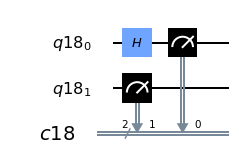

In [118]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.h(q[0])
circ.measure(q, c)
circ.draw(output='mpl')

{'00': 490, '01': 534}


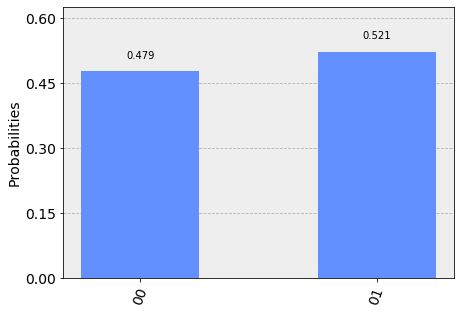

In [119]:
job = execute(circ, backend=simulator, shots=1024)
st = job.result().get_counts()
print(st)
plot_histogram(st)


In [188]:
import numpy as np
from qiskit.extensions import HGate, CnotGate, IdGate, XGate, CzGate

H = HGate().to_matrix()
I = IdGate().to_matrix()
X = XGate().to_matrix()
Cz = CzGate().to_matrix()
CX01 = CnotGate().to_matrix()

#reg = np.array([[1., 1.],
#               [0., 0.]], dtype=complex) 

zero = np.array([[1.],
                 [0.]])
qr = np.kron(zero, zero)
X_q0 = np.kron(I, X)
X_q1 = np.kron(X, I) # q1q0: little endian
H_q0 = np.kron(H, I) # q1q0: little endian
H_q1 = np.kron(H, I) # q1q0: little endian


In [172]:
circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.x(q[1])
circ.measure(q, c)
job = execute(circ, backend=simulator_vec, shots=1024)
st = job.result().get_counts()
print(st)
print(job.result().get_statevector())
# plot_histogram(st)

{'10': 1}
[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


In [173]:
qr = np.kron(zero, zero)
qr = np.dot(X_q1, qr)
qr

array([[0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j]])

In [174]:
X_q0 = np.kron(I, X)
qr = np.kron(zero, zero)
qr = np.dot(X_q0, qr)
qr

array([[0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j]])

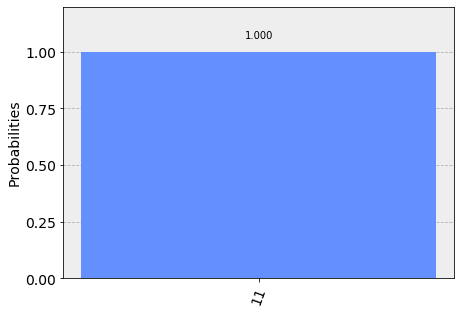

In [176]:
circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.x(q[0])
circ.cx(q[0], q[1])
circ.measure(q, c)
job = execute(circ, backend=simulator, shots=1024)
st = job.result().get_counts()
plot_histogram(st)

In [177]:
qr = np.kron(zero, zero)
qr = np.dot(X_q0, qr)
qr = np.dot(CX01, qr)
qr

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j]])

{'00': 511, '11': 513}


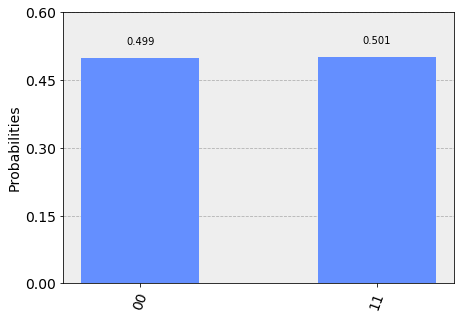

In [178]:
circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q, c)
job = execute(circ, backend=simulator, shots=1024)
st = job.result().get_counts()
print(st)
plot_histogram(st)

In [186]:
qr = np.kron(zero, zero)
qr = np.dot(H_q0, qr)
qr = np.dot(H_q1, qr) #coś tu nie gra
#qr = np.dot(CX, qr)
qr
# TODO: Should be [0.7, 0, 0, 0.7]

array([[ 1.00000000e+00+0.j],
       [ 0.00000000e+00+0.j],
       [-2.23711432e-17+0.j],
       [ 0.00000000e+00+0.j]])